# 분류하는 뉴런을 만든다. - 이진분류

## 초기 인공지능 알고리즘과 로지스틱 회귀를 알아본다

### 퍼셉트론(Perceptron)

+ 이진분류란 임의의 샘플 데이터를 True와 False로 구분하는 문제를 말한다.
+ 퍼셉트론은 Linear Regression과 유사한 구조를 가지고 있음. -> 직선 방정식을 사용하기 때문
+ 퍼셉트론은 마지막 단계에서 샘플을 이진 분류하기 위해 Step Function(계단함수)를 사용
+ 그리고 계단 함수를 통과한 값을 다시 가중치와 절편을 업데이트(학습)하는데 사용


+ w1x1 + w2x2 + b = z -> 선형함수 (w = 가중치, x = 입력)
+ 일반화 : z = b+ sigma(i=1 ->n)wixi
+ 계단함수는 z가 0보다 크거나 같으면 1, 0보다 작으면 -1로 분류
+ 1 = 양성클래스(positive class), -1= 음성클래스(Negative class)
+ 퍼셉트론은 계단함수의 결과를 사용하여 가중치와 절편을 업데이트

### 퍼셉트론의 차세대 알고리즘 아달린(Adaline)

+ 아달린(Adaline)은 다른 말로 적응형 선형 뉴런(Adaptive Linear Neuron)이라고도 한다.
+ 아달린은 역방향 계산이 계단 함수 출력 이후에 일어나지 않고 선형 함수 출력 이후에 진행된다.

### 아달린의 차세대 알고리즘 로지스틱 회귀(Logistic Regression)

+ 로지스틱 회귀는 선형 함수를 통과시켜 z를 임계 함수에 보내기 전에 변형시키는데 이런 함수를 활성화 함수(activation function)이라고 한다.
+ 활성화 함수 = 로지스틱 시그모이드 함수 (p= 1/1+e^-z)
+ 활성화 함수를 통과한 값을 a라고 표현단다.
+ 로지스틱 마지막 단계에서 임계 함수(threshold function)을 사용해 예측을 진행

+ 임계 함수는 아달린이나 퍼셉트론의 계단 함수와 역할은 비슷하지만 활성화 함수의 출력값을 사용한다는 점이 다르다.

## 시그모이드 함수로 확률을 만든다.

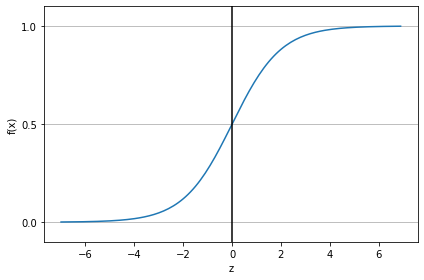

In [1]:
# 로지스틱 시그모이드 시각화

# 로지스틱 회귀
# 분류를 확률로 생각하는 방식
# 어느 클래스에 분류되는지 구하는것 -> 함수가 필요(시그모이드 함수)
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
z = np.arange(-7,7,0.1)
f_x = sigmoid(z)

#시각화 코드
plt.plot(z,f_x)
plt.axvline(0.0, color = 'k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('f(x)')

plt.yticks([0.0,0.5,1.0])
ax =plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

+ 시그모이드 함수는 z를 0~1 사이의 확률 값으로 변환시켜주는 역할을 한다.
+ 즉, 시그모이드 함수를 통과한 값 a를 암 종양 판정에 사용하면 "양성"일 확률로 해석할 수 있음
+ 확률을 해석하기 나름이지만 0.5를 경계선으로 판단한다

### 시그모이드 함수가 만들어지는 과정


+ 시그모이드 함수가 만들어지는 과정
+ 오즈 비 -> 로짓 함수 -> 시그모이드 함수

#### 오즈 비(Odds Ratio)란?
+ 오즈 비는 성공확률과 실패확률의 비율을 나타내는 통계이며 다음과 같이 정의한다.
+ OR = p/1-p(p는 성공 확률)
+ 간단하게 성공확률/실패확률



#### 로짓 함수(logit function)란?
+ 오즈 비에 로그 함수를 취하여 만든 함수이다.
+ logit(p) = log(OR)
+ 로짓 함수는 p가 0.5일때 0이 되고 p가 0과 1일때 각각 무한대로 음수와 양수가 되는 특징을 가짐
+ z = log(OR)



#### 로지스틱 함수란?
+ 로짓 함수를 z에 대해 정리한 것
+ z에 대해 정리하는 이유는 가로 축을 z로 놓기 위함


### 로지스틱 회귀 중간 정리하기
+ a를 0과 1로 구분하기 위하여 임계함수를 적용(a>0.5,a<=0.5)
+ 그 결과 (x)는 0 또는 1의 값으로 나누어짐. -> 이진분류

## 분류용 데이터 세트를 준비합니다

(569, 30) (569,)


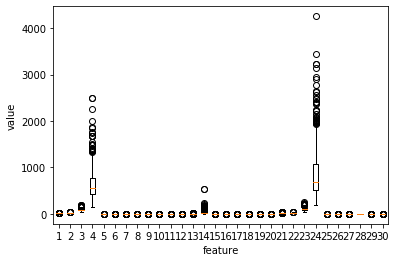

In [2]:
# 유방암 데이터 세트 준비하기
# load_breast_cancer() 함수 호출하기
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.data.shape, cancer.target.shape)

#박스플롯으로 특성의 사분위 관찰하기
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [3]:
# 눈에 띄는 특성 살펴보기
# 박스플롯의 결과 4,14,24번째 특성이 눈에 잘 띄임
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [4]:
# 타깃 데이터 확인하기
# unique()를 사용하면 고유한 값을 찾아 반환한다.
# cancer.target 배열 안에는 0과 1이 있는데 이것은 이진분류를 나타낸것
# return_counts 매개변수를 True로 지정하면 고유한 값이 등장하는 횟수까지 세어 반환.

np.unique(cancer.target,return_counts = True)

(array([0, 1]), array([212, 357]))

In [5]:
# 훈련 데이터셋 저장
x = cancer.data
y = cancer.target

## 로지스틱 회귀를 위한 뉴런을 만든다

### 모델의 성능 평가를 위한 훈련 세트와 테스트 세트
+ 훈련된 모델의 실전 성능을 일반화성능(gerneralization performance)라고 한다.
+  훈련 데이터셋 = 훈련 셋 + 테스트 셋

### 훈련 데이터셋을 훈련 셋과 테스트 셋으로 나누는 규칙
+ 훈련 데이터 세트를 나눌 때는 테스트 세트보다 훈련 세트가 더 많아야함
+ 훈련 데이터 세트를 나누기 전에 양성,음성 클래스가 훈련 세트나 테스트 세트의 어느 한쪽에
몰리지 않도록 골고루 섞어야 함.

In [6]:
# train_test_split()함수로 훈련 데이터셋 나누기
from sklearn.model_selection import train_test_split
#train_test_split() 함수에 입력데이터 x, 타깃 데이터 y와 그 밖의 설정을 매개변수로 지정하면 된다.
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,
                                                   test_size=0.2,
                                                   random_state=42)

# 1. stratify는 훈련 데이터를 나눌 때 클래스 비율을 동일하게 만든다
# train_test_split()함수는 기본적을 ㅗ데이터를 나누기 전에 섞지만 일부 클래스 비율이 불균형한 경우엔 stratify를 y로 지정해야 한다.

# 2. test_size는 비율을 조정한다
# train_test_split()은 75:25의 비율로 나누지만 test_size에 매개변수를 지정해주면
# 다른 비율로도 조정이 가능하다.

# 3. random_state = 난수 초기값 지정



# 결과 확인하기
print(x_train.shape, x_test.shape)

# unique()로 훈련 세트의 타깃 확인
np.unique(y_train,return_counts= True)

(455, 30) (114, 30)


(array([0, 1]), array([170, 285]))

In [7]:
# 로지스틱 회귀 구현하기
class LogisticNeuron:
    def __init__(self):
        self.w = None
        self.b = None
    
    def forpass(self,x):
        z = np.sum(x*self.w)+self.b
        return z
    
    def backprop(self,x,err):
        w_grad  = x*err
        b_grad = 1*err
        return w_grad,b_grad
    
#훈련하는 메서드 구현
    def fit(self,x,y,epochs=100):
        self.w =np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            for x_i,y_i in zip(x,y):
                z = self.forpass(x_i)
                a = self.activation(z)
                err = -(y_i - a)
                w_grad,b_grad = self.backprop(x_i,err)
                self.w -= w_grad
                self.b -= b_grad
                
    def activation(self,z):
        a = 1/(1+np.exp(-z))
        return a

#예측하는 메소드 구현
    def predict(self,x):
        z = [self.forpass(x_i) for x_i in x]
        a = self.activation(np.array(z))
        return a >0.5

# 모델 훈련하기
neuron = LogisticNeuron()
neuron.fit(x_train,y_train)
# 정확도 ㅍ여가하기
np.mean(neuron.predict(x_test) == y_test)

/Users/leonilpark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


0.8245614035087719

## 로지스틱 회귀 뉴런으로 단일층 신경망을 만듭니다

### 일반적인 신경망의 모습을 알아보자
+ 로지스틱 회귀는 Hidden layer가 없는 신경망
+ 입력층과 출력층만 가지는 신경망을 단일층 신경망이라고 함

### 단일층 신경망을 구현한다.
+ 경사 하강법은 손실함수의 결과값을 최소화 하는 방향으로 가중치를 업데이트 했음
+ If 손실 함수의 결과값이 줄어들지 않는다면 뭔가 잘못된 것이니 값을 관찰해보기 바람

### 여러 가지 경사 하강법에 대해 알아보자
+ 지금까지 사용한 경사하강법은 샘플 데이터 1개에 대한 그레디언트를 계산했음
+ ㄴ 를 확률적 경사 하강법(stochastic gradient descent)라고 함


+ 전체 훈련 세트를 사용하여 한번에 그레디언트를 계산하는 방식 = 배치 경사 하강법
+ 배치(batch) 크기를 작게 하여 처리하는 방식인 미니배치 경사 하강법이 있다.


+ 미니 배치 경사 하강법
+ 1. 전체 샘플 중 몇개의 샘플을 중복되지 않도록 무작위로 진행
+ 2. 그레디언트 계산

+ 확률적 경사 하강법은 샘플 각각 그레디언트를 계산하여 가중치를 업데이트하므로

최적의 값에 도달하는 과정이 불안정함


+ 배치 경사 하강법은 전체 훈련 데이터셋을 사용하여 한 번에 그레디언트를 계산하므로

가중치가 최적값에 수렴하는 과정은 안정적이지만 비용이 많이 듬


+ 미니 배치 경사 하강법 = 위 두개의 하강법에서 장점을 절충한 것



+ 매 에포크마다 훈련 세트의 샘플 순서를 섞어 사용하기
+ 훈련 세트의 샘플 순서를 섞으면 가중치 최적값의 탐색 과정이 다양해져 가중치 최적값을 제대로 찾을 수 있다.
+ 훈련 세트의 샘플 순서를 섞는 전형적인 방법은 넘파이 배열의 인덱스를 섞은 후 인덱스 순서대로 샘플을 뽑는 것
+ 이를 np.random.permutation() 함수를 사용한다.

In [13]:
# 손실 함수의 결과값 조정해 저장 기능 추가하기
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
    
    def forpass(self,x):
        z = np.sum(x*self.w)+self.b
        return z
    
    def backprop(self,x,err):
        w_grad  = x*err
        b_grad = 1*err
        return w_grad,b_grad
    
#훈련하는 메서드 구현
    def fit(self,x,y,epochs=100):
        self.w =np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in index: #모든 샘플에 대해 반복
                z = self.forpass(x_i) #정방향 계산
                a = self.activation(z) #활성화 함수 적용
                err = -(y_i - a) #오차 계산
                w_grad,b_grad = self.backprop(x_i,err) #역방향 계산
                self.w -= w_grad #가중치 업데이트
                self.b -= b_grad #절편 업데이트
                #안전한 로그 계산을 위해 클리핑한 후 손실을 누적한다.
                #클리핑 = 범위지정
                # 범위를 보면 1의 차이가 나는 것을 볼 수 가 있는데 로지스틱 시그모이드의 범위가 1이기 때문
                a = np.clip(a,1e-10,1-1e-10)
                loss += -(y[i]*no.log(a)+(1-y[i]*np.loa(1-a)))
            self.losses.append(loss/len(y)) #에포크마다 평균 손실을 저장한다.


In [14]:
# score() 메소드 추가하기
# 정확도를 계산해주는 메소드를 추가하고 predict()도 수정함
# score()에서는 np.mean()함수를 사용
def predict(self,x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0
def score(self, x, y):
    return np.mean(self.predict(x) == y)

/Users/leonilpark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


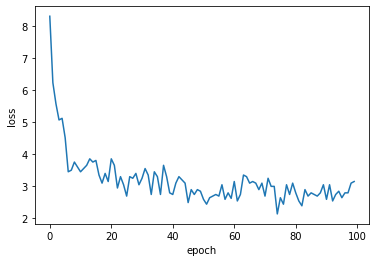

In [28]:
# 단일층 신경망 훈련하기



# 손실 함수의 결과값 조정해 저장 기능 추가하기
class Singlelayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
    
    def forpass(self,x):
        z = np.sum(x*self.w)+self.b
        return z
    
    def backprop(self,x,err):
        w_grad  = x*err
        b_grad = 1*err
        return w_grad,b_grad
    
    def add_bias(self,x):
        return np.c_[np.pones((x.shape[0],1)),x]
    
    def activation(self,z):
        a = 1 / (1+np.exp(-z))
        return a
    
#훈련하는 메서드 구현
    def fit(self,x,y,epochs=100):
        self.w =np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes: #모든 샘플에 대해 반복
                z = self.forpass(x[i]) #정방향 계산
                a = self.activation(z) #활성화 함수 적용
                err = -(y[i] - a) #오차 계산
                w_grad,b_grad = self.backprop(x[i],err) #역방향 계산
                self.w -= w_grad #가중치 업데이트
                self.b -= b_grad #절편 업데이트
                #안전한 로그 계산을 위해 클리핑한 후 손실을 누적한다.
                #클리핑 = 범위지정
                # 범위를 보면 1의 차이가 나는 것을 볼 수 가 있는데 로지스틱 시그모이드의 범위가 1이기 때문
                a = np.clip(a,1e-10,1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y)) #에포크마다 평균 손실을 저장한다.
    def predict(self,x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

# 1. 단일층 신경망 훈련하고 정확도 출력하기
layer = Singlelayer()
layer.fit(x_train,y_train)
layer.score(x_test,y_test)
# -> 에포크마다 훈련 셋을 무작위로 섞어 손실 함수의 값을 줄임

# 2. 손실 함수 누적값 확인하기
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 사이킷런으로 로지스틱 회귀를 수행하는 방법

In [35]:
# 로지스틱 경사 하강법 적용하기
from sklearn.linear_model import SGDClassifier
# 1. 로지스틱 손실 함수 지정하기
sgd = SGDClassifier(loss ='log', max_iter = 100, tol =1e-3, random_state = 42)
# max_iter를 통해 반복 횟수를 100으로 지정하고 반복 실행했을 때 결과를 동일하게 재현하기 위해
# random_state를 통해 난수 초깃값을 42로 설정
# 반복할 때마다 로지스틱 손실 함수의 값이 tol에 지정한 값만큼 감소되지 않으면 반복을 중단하도록 설정
# 만약 tol의 값을 설정하지 않으면 max_iter의 값을 늘리라는 경고가 발생.
# 이는 모델의 로지스틱 손실 함수의 값이 최적값으로 수렴할 정도로 충분한 반복 횟수를 입력했는지 사용자에게 알려주므로 유용

# 2. 사이킷런으로 훈련하고 평가하기
sgd.fit(x_train,y_train)
sgd.score(x_test,y_test)

# 3. 사이킷런으로 예측하기
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])